Tham khảo:
*   https://cv.gluon.ai/build/examples_datasets/detection_custom.html
*   https://cv.gluon.ai/build/examples_detection/train_ssd_voc.html
*   https://cv.gluon.ai/install.html



# **1) Cài đặt Libraries**

In [1]:
import time
import numpy

In [2]:
# for mxnet
!pip install --upgrade mxnet
# for pytorch
!pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

!pip install --upgrade gluoncv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.6.0+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cud

# **2) Chạy lại mô hình pretrain của GluonCV**

100%|██████████| 160/160 [00:00<00:00, 3600.20KB/s]


(576, 768, 3)


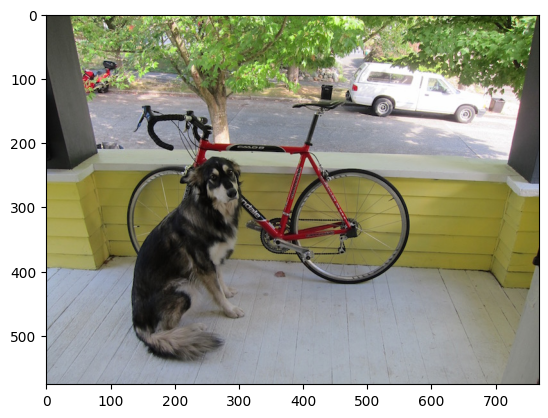

In [4]:
import os, zipfile
from gluoncv.utils import download, viz
import mxnet as mx
import numpy as np
from matplotlib import pyplot as plt

im_fname = download('https://github.com/dmlc/web-data/blob/master/' + 'gluoncv/datasets/dog.jpg?raw=true', path='dog.jpg')
img = mx.image.imread(im_fname)
ax = viz.plot_image(img)
print(img.shape)
plt.show()

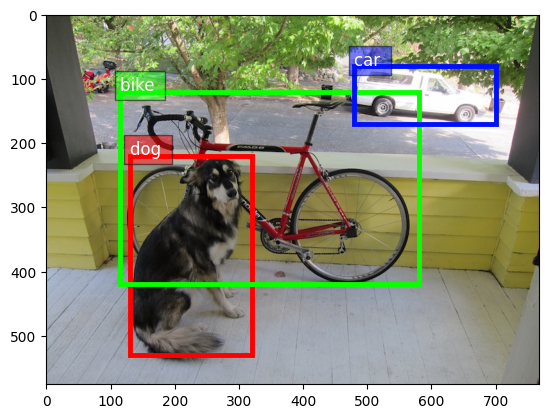

In [6]:
dog_label = [130, 220, 320, 530]
bike_label = [115, 120, 580, 420]
car_label = [480, 80, 700, 170]
all_boxes = np.array([dog_label, bike_label, car_label])
all_ids = np.array([0, 1, 2])
class_names = ['dog', 'bike', 'car']

# see how it looks by rendering the boxes into image
ax = viz.plot_bbox(img, all_boxes, labels=all_ids, class_names=class_names)
plt.show()

In [7]:
def write_line(img_path, im_shape, boxes, ids, idx):
    h, w, c = im_shape
    # for header, we use minimal length 2, plus width and height
    # with A: 4, B: 5, C: width, D: height
    A = 4
    B = 5
    C = w
    D = h
    # concat id and bboxes
    labels = np.hstack((ids.reshape(-1, 1), boxes)).astype('float')
    # normalized bboxes (recommanded)
    labels[:, (1, 3)] /= float(w)
    labels[:, (2, 4)] /= float(h)
    # flatten
    labels = labels.flatten().tolist()
    str_idx = [str(idx)]
    str_header = [str(x) for x in [A, B, C, D]]
    str_labels = [str(x) for x in labels]
    str_path = [img_path]
    line = '\t'.join(str_idx + str_header + str_labels + str_path) + '\n'
    return line

In [8]:
with open('val.lst', 'w') as fw:
    for i in range(4):
        line = write_line('dog.jpg', img.shape, all_boxes, all_ids, i)
        print(line)
        fw.write(line)

0	4	5	768	576	0.0	0.16927083333333334	0.3819444444444444	0.4166666666666667	0.9201388888888888	1.0	0.14973958333333334	0.20833333333333334	0.7552083333333334	0.7291666666666666	2.0	0.625	0.1388888888888889	0.9114583333333334	0.2951388888888889	dog.jpg

1	4	5	768	576	0.0	0.16927083333333334	0.3819444444444444	0.4166666666666667	0.9201388888888888	1.0	0.14973958333333334	0.20833333333333334	0.7552083333333334	0.7291666666666666	2.0	0.625	0.1388888888888889	0.9114583333333334	0.2951388888888889	dog.jpg

2	4	5	768	576	0.0	0.16927083333333334	0.3819444444444444	0.4166666666666667	0.9201388888888888	1.0	0.14973958333333334	0.20833333333333334	0.7552083333333334	0.7291666666666666	2.0	0.625	0.1388888888888889	0.9114583333333334	0.2951388888888889	dog.jpg

3	4	5	768	576	0.0	0.16927083333333334	0.3819444444444444	0.4166666666666667	0.9201388888888888	1.0	0.14973958333333334	0.20833333333333334	0.7552083333333334	0.7291666666666666	2.0	0.625	0.1388888888888889	0.9114583333333334	0.29513888888888

In [9]:
from gluoncv.data import LstDetection
lst_dataset = LstDetection('val.lst', root=os.path.expanduser('.'))
print('length:', len(lst_dataset))
first_img = lst_dataset[0][0]
print('image shape:', first_img.shape)
print('Label example:')
print(lst_dataset[0][1])
print("GluonCV swaps bounding boxes to columns 0-3 by default")

length: 4
image shape: (576, 768, 3)
Label example:
[[130. 220. 320. 530.   0.]
 [115. 120. 580. 420.   1.]
 [480.  80. 700. 170.   2.]]
GluonCV swaps bounding boxes to columns 0-3 by default


In [10]:
import sys
import subprocess
im2rec = download('https://raw.githubusercontent.com/apache/incubator-mxnet/' +
                        '6843914f642c8343aaa9a09db803b6af6f5d94a2/tools/im2rec.py', 'im2rec.py')
# In this tutorial we skip generating in subprocess but instead download a prepared val.rec
# subprocess.check_output([sys.executable, 'im2rec.py', 'val', '.', '--no-shuffle', '--pass-through', '--pack-label'])
download('https://gist.github.com/zhreshold/599999eab290e951fcfb26cdd59885e2/raw/0d945eeea2a71ba7bd3e39d463f39921acb786d1/val.rec', 'val.rec')
download('https://gist.github.com/zhreshold/599999eab290e951fcfb26cdd59885e2/raw/0d945eeea2a71ba7bd3e39d463f39921acb786d1/val.idx', 'val.idx')

14KB [00:00, 5879.08KB/s]            


641KB [00:00, 7145.23KB/s]             


1KB [00:00, 1955.39KB/s]


'val.idx'

In [11]:
from gluoncv.data import RecordFileDetection
record_dataset = RecordFileDetection('val.rec', coord_normalized=True)

# we expect same results from LstDetection
print('length:', len(record_dataset))
first_img = record_dataset[0][0]
print('image shape:', first_img.shape)
print('Label example:')
print(record_dataset[0][1])

length: 4
image shape: (576, 768, 3)
Label example:
[[130. 220. 320. 530.   0.]
 [115. 120. 580. 420.   1.]
 [480.  80. 700. 170.   2.]]


In [12]:
fname = download('https://github.com/dmlc/web-data/blob/master/gluoncv/datasets/VOCtemplate.zip?raw=true', 'VOCtemplate.zip')
with zipfile.ZipFile(fname) as zf:
    zf.extractall('.')

100%|██████████| 79/79 [00:00<00:00, 1977.90KB/s]


In [13]:
with open('VOCtemplate/VOC2018/Annotations/000001.xml', 'r') as fid:
    print(fid.read())

<annotation>
	<filename>000001.jpg</filename>
	<size>
		<width>353</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<object>
		<name>dog</name>
		<difficult>0</difficult>
		<bndbox>
			<xmin>48</xmin>
			<ymin>240</ymin>
			<xmax>195</xmax>
			<ymax>371</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<difficult>0</difficult>
		<bndbox>
			<xmin>8</xmin>
			<ymin>12</ymin>
			<xmax>352</xmax>
			<ymax>498</ymax>
		</bndbox>
	</object>
</annotation>



In [14]:
from gluoncv.data import VOCDetection
class VOCLike(VOCDetection):
    CLASSES = ['person', 'dog']
    def __init__(self, root, splits, transform=None, index_map=None, preload_label=True):
        super(VOCLike, self).__init__(root, splits, transform, index_map, preload_label)

dataset = VOCLike(root='VOCtemplate', splits=((2018, 'train'),))
print('length of dataset:', len(dataset))
print('label example:')
print(dataset[0][1])

length of dataset: 1
label example:
[[ 47. 239. 194. 370.   1.   0.]
 [  7.  11. 351. 497.   0.   0.]]


# **3) Download bộ dữ liệu về VOCDetection.**

In [17]:
%cd /content/
!mkdir -p "./mxnet_gluoncv/"
%cd /content/mxnet_gluoncv

/content
/content/mxnet_gluoncv


Link dataset:


*   http://host.robots.ox.ac.uk/pascal/VOC/voc2012/
*   https://cv.gluon.ai/build/examples_datasets/pascal_voc.html#sphx-glr-build-examples-datasets-pascal-voc-py

In [22]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf /content/mxnet_gluoncv/VOCtrainval_11-May-2012.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC

In [26]:
from gluoncv.data import VOCDetection

train_dataset = VOCDetection(root='/content/mxnet_gluoncv/VOCdevkit/', splits=[(2012, 'train')])
test_dataset = VOCDetection(root='/content/mxnet_gluoncv/VOCdevkit/',splits=[(2012, 'val')])

print('Training images:', len(train_dataset))
print('Testing images:', len(test_dataset))

Training images: 5717
Testing images: 5823


# **4) Biến đổi dữ liệu**

In [27]:
train_image, train_label = train_dataset[0]
bboxes = train_label[:, :4]
cids = train_label[:, 4:5]
print('image:', train_image.shape)
print('bboxes:', bboxes.shape, 'class ids:', cids.shape)

image: (442, 500, 3)
bboxes: (2, 4) class ids: (2, 1)


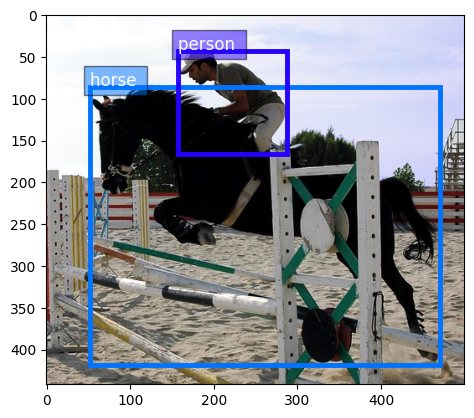

In [28]:
from matplotlib import pyplot as plt
from gluoncv.utils import viz

ax = viz.plot_bbox(
    train_image.asnumpy(),
    bboxes,
    labels=cids,
    class_names=train_dataset.classes)
plt.show()

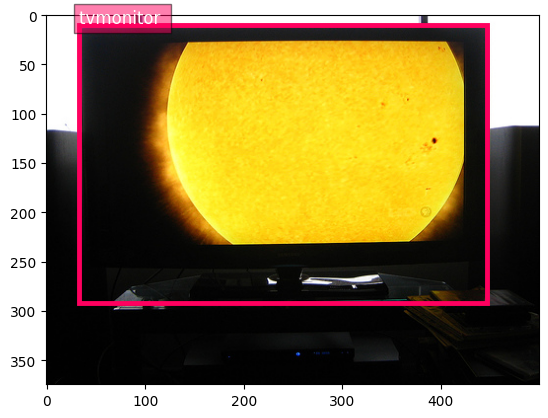

In [29]:
test_image, test_label = test_dataset[0]
bboxes = test_label[:, :4]
cids = test_label[:, 4:5]
ax = viz.plot_bbox(
    test_image.asnumpy(),
    bboxes,
    labels=cids,
    class_names=train_dataset.classes)
plt.show()

In [33]:
from gluoncv.data.transforms import presets
from gluoncv.utils import random
from mxnet import nd

In [39]:
width, height = 512, 512  # suppose we use 512 as base training size
train_transform = presets.ssd.SSDDefaultTrainTransform(width, height)
test_transform = presets.ssd.SSDDefaultValTransform(width, height)

In [35]:
random.seed(233)

In [36]:
train_image2, train_label2 = train_transform(train_image, train_label)
print('tensor shape:', train_image2.shape)

tensor shape: (3, 512, 512)


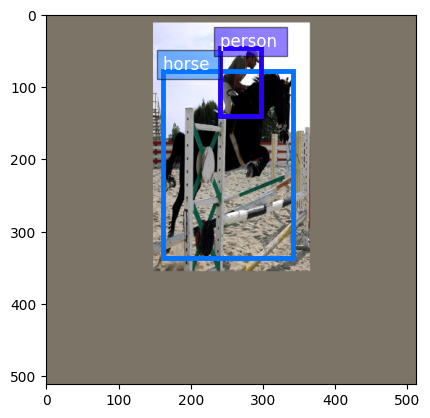

In [37]:
train_image2 = train_image2.transpose(
    (1, 2, 0)) * nd.array((0.229, 0.224, 0.225)) + nd.array((0.485, 0.456, 0.406))
train_image2 = (train_image2 * 255).clip(0, 255)
ax = viz.plot_bbox(train_image2.asnumpy(), train_label2[:, :4],
                   labels=train_label2[:, 4:5],
                   class_names=train_dataset.classes)
plt.show()

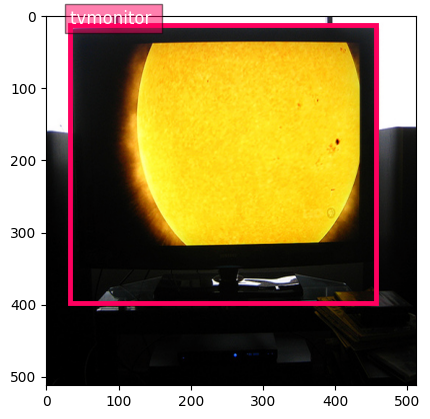

In [40]:
test_image2, test_label2 = test_transform(test_image, test_label)
test_image2 = test_image2.transpose(
    (1, 2, 0)) * nd.array((0.229, 0.224, 0.225)) + nd.array((0.485, 0.456, 0.406))
test_image2 = (test_image2 * 255).clip(0, 255)
ax = viz.plot_bbox(test_image2.clip(0, 255).asnumpy(), test_label2[:, :4],
                   labels=test_label2[:, 4:5],
                   class_names=train_dataset.classes)
plt.show()

# **5) Data Loader**

In [41]:
from gluoncv.data.batchify import Tuple, Stack, Pad
from mxnet.gluon.data import DataLoader

batch_size = 2  # for tutorial, we use smaller batch-size
# you can make it larger(if your CPU has more cores) to accelerate data loading
num_workers = 0

# behavior of batchify_fn: stack images, and pad labels
batchify_fn = Tuple(Stack(), Pad(pad_val=-1))
train_loader = DataLoader(
    train_dataset.transform(train_transform),
    batch_size,
    shuffle=True,
    batchify_fn=batchify_fn,
    last_batch='rollover',
    num_workers=num_workers)
test_loader = DataLoader(
    test_dataset.transform(test_transform),
    batch_size,
    shuffle=False,
    batchify_fn=batchify_fn,
    last_batch='keep',
    num_workers=num_workers)

for ib, batch in enumerate(train_loader):
    if ib > 3:
        break
    print('data:', batch[0].shape, 'label:', batch[1].shape)

data: (2, 3, 512, 512) label: (2, 3, 6)
data: (2, 3, 512, 512) label: (2, 1, 6)
data: (2, 3, 512, 512) label: (2, 3, 6)
data: (2, 3, 512, 512) label: (2, 2, 6)


# **6) Training mô hình**

In [50]:
from gluoncv.model_zoo import get_model
import time
start_time = time.time()
net = get_model('ssd_300_vgg16_atrous_voc', pretrained_base=False)
end_time = time.time()
inference_time = end_time - start_time
print(f"Took: {inference_time} seconds")
print(net)

Took: 0.7053766250610352 seconds
SSD(
  (features): VGGAtrousExtractor(
    (stages): HybridSequential(
      (0): HybridSequential(
        (0): Conv2D(None -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Activation(relu)
        (2): Conv2D(None -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Activation(relu)
      )
      (1): HybridSequential(
        (0): Conv2D(None -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Activation(relu)
        (2): Conv2D(None -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Activation(relu)
      )
      (2): HybridSequential(
        (0): Conv2D(None -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Activation(relu)
        (2): Conv2D(None -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Activation(relu)
        (4): Conv2D(None -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (5): Activation(rel

In [44]:
import mxnet as mx
x = mx.nd.zeros(shape=(1, 3, 512, 512))
net.initialize()
cids, scores, bboxes = net(x)

In [45]:
from mxnet import autograd
with autograd.train_mode():
    cls_preds, box_preds, anchors = net(x)

In [46]:
from mxnet import gluon
train_transform = presets.ssd.SSDDefaultTrainTransform(width, height, anchors)
batchify_fn = Tuple(Stack(), Stack(), Stack())
train_loader = DataLoader(
    train_dataset.transform(train_transform),
    batch_size,
    shuffle=True,
    batchify_fn=batchify_fn,
    last_batch='rollover',
    num_workers=num_workers)

In [49]:
from gluoncv.loss import SSDMultiBoxLoss
import time
mbox_loss = SSDMultiBoxLoss()
start_time = time.time()
trainer = gluon.Trainer(
    net.collect_params(), 'sgd',
    {'learning_rate': 0.001, 'wd': 0.0005, 'momentum': 0.9})

for ib, batch in enumerate(train_loader):
    if ib > 0:
        break
    print('data:', batch[0].shape)
    print('class targets:', batch[1].shape)
    print('box targets:', batch[2].shape)
    with autograd.record():
        cls_pred, box_pred, anchors = net(batch[0])
        sum_loss, cls_loss, box_loss = mbox_loss(
            cls_pred, box_pred, batch[1], batch[2])
end_time = time.time()
training_time = end_time - start_time
print(f"Took: {training_time} seconds")

data: (2, 3, 512, 512)
class targets: (2, 24656)
box targets: (2, 24656, 4)
Took: 9.59215521812439 seconds
